In [81]:
% reload_ext autoreload
% autoreload 2
% matplotlib inline
from IPython import display

import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torchvision import transforms
import torch
from torch import nn
from torch.utils.data import DataLoader

import utils
import models

## MNIST

In [89]:
# a torch.utils.data.DataSet instance. Can be indexed to lazily
# load instance/label. Ideally all datasets should be subclassed from
# DataSet.
traindata = models.mnist.Data(root='~/Downloads/MNIST', train=True)

print('Instances: {}'.format(len(dataset)))

Instances: 60000


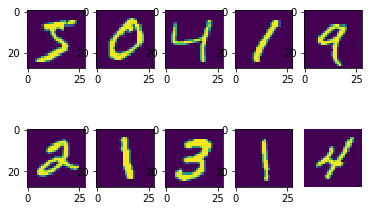

In [94]:
fig, (row1, row2) = plt.subplots(nrows=2, ncols=5)
for i, ax in enumerate((*row1, *row2)):
    x, y = dataset[i]  # x.shape == (1, 28, 28), y.shape == (1, 10)
    ax.imshow(x[0])

In [ ]:
# Define hyperparameters
EPOCHS = 1
BATCH_SIZE = 10
LRATE = 1e-3
MOMENTUM = 0.9
USE_CUDA = True

# Set up device for computation
DEVICE = torch.device("cuda:0" if (torch.cuda.is_available() and USE_CUDA) else "cpu")

# Set up data loader -
# A torch.utils.data.DataLoader instance. Can be used to iterate over batches
# of data. Can use multiple processes to speed up i/o. A fancy wrapper
# around DataSet.
trainloader = DataLoader(traindata, batch_size=BATCH_SIZE)

# Instantiate the defined network
net = models.mnist.Net()
# Send the network to GPU if available
net.to(DEVICE)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=LRATE, momentum=MOMENTUM)

for epoch in range(EPOCHS):
    print('Epoch #', epoch)
    running_loss = 0.
    for i, (batchX, batchY) in enumerate(trainloader, 1):
        batchX, batchY = batchX.to(DEVICE), batchY.to(DEVICE)
        
        optimizer.zero_grad()           # clear gradients from prev. step
        predY = net(batchX)             # get predicted labels
        loss = criterion(predY, batchY) # compute loss
        loss.backward()                 # backpropagate - populate error grad.
        optimizer.step()                # update weights based on gradients
        
        running_loss += loss.item()
        if i % 1000 == 0:
            print('Min-batch # {0:4d}\t Loss: {1:3.3f}'.format(i, running_loss / 1000))
            running_loss = 0.

In [92]:
# Evaluate on test set
testdata = models.mnist.Data(root='~/Downloads/MNIST', train=False)
testloader = DataLoader(testdata, batch_size=BATCH_SIZE)

total = len(testdata)
correct = 0
for batchX, batchY in testloader:
    batchX, batchY = batchX.to(DEVICE), batchY.to(DEVICE)
    _, pred = torch.max(net(batchX), 1)
    correct += (pred == batchY).sum().item()

print('Accuracy: {:.2f}%'.format(100 * correct / total))

Accuracy: 93.39%
